In [21]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics, svm,decomposition

In [26]:
lfw_data = datasets.fetch_lfw_people(min_faces_per_person = 100, resize=0.4)
lfw_data.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [30]:
lfw_data.data.shape

(1140, 1850)

In [18]:
lfw_data.target_names
np.unique(lfw_data.target, return_counts = True)

(array([0, 1, 2, 3, 4]), array([236, 121, 530, 109, 144]))

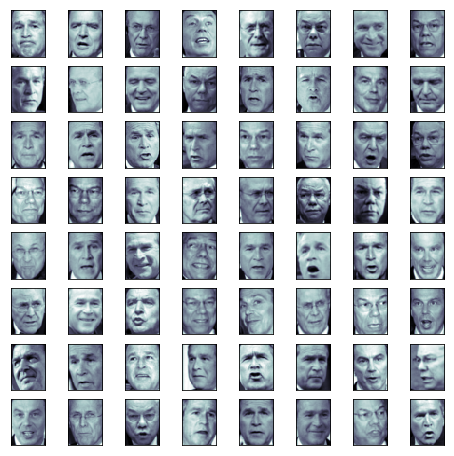

In [25]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_data.images[i], cmap = plt.cm.bone)
plt.show()

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(lfw_data.data, lfw_data.target) 

In [34]:
pca = decomposition.PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
k = 0
total = 0
while total < 0.95:
    total = total + pca.explained_variance_ratio_[k]
    k = k + 1
k

131

In [39]:
pca = decomposition.PCA(n_components=131)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [41]:
x_train_pca.shape, x_test_pca.shape

((855, 131), (285, 131))

In [42]:
svc = svm.SVC()
svc.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_test_pred = svc.predict(x_test_pca)
metrics.confusion_matrix(y_test, y_test_pred)

array([[  0,   0,  46,   0,   0],
       [  0,   0,  32,   0,   0],
       [  0,   0, 137,   0,   0],
       [  0,   0,  30,   0,   0],
       [  0,   0,  40,   0,   0]])